# 1. For the given corpus, build word embeddings using Gensim library with:


In [ ]:
corpus = ['I love nlp', 'I will learn nlp in 2 months', 'nlp is the future of data science','nlp saves time and solves a lot of industry problems','nlp uses machine learning']

In [ ]:
!pip install gensim


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to C:\Users\Ragunathan E
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# a) 50 features, context window is 3, CBOW

In [ ]:
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

In [ ]:
# Define and train the Word2Vec model with increased min_count and epochs
model = Word2Vec(
    tokenized_corpus,
    vector_size=50,
    window=3,
    sg=0,
    min_count=1,
    epochs=200
)


In [ ]:
# Build the vocabulary
model.build_vocab(tokenized_corpus)

In [ ]:
# Train the model
model.train(tokenized_corpus, total_examples=len(tokenized_corpus), epochs=model.epochs)

(1156, 6200)

In [ ]:
similar_words = model.wv.most_similar('nlp')

In [ ]:
# Print the similar words and their similarity scores
for word, score in similar_words:
    print(f"Word: {word}, Similarity Score: {score:.4f}")

Word: time, Similarity Score: 0.4561
Word: a, Similarity Score: 0.4546
Word: of, Similarity Score: 0.4406
Word: i, Similarity Score: 0.3909
Word: saves, Similarity Score: 0.3740
Word: and, Similarity Score: 0.3710
Word: learn, Similarity Score: 0.3513
Word: machine, Similarity Score: 0.3355
Word: industry, Similarity Score: 0.3270
Word: solves, Similarity Score: 0.3155


In [ ]:
# b) 30 features, context window is 5, Skipgram

In [ ]:
model2 = Word2Vec(
    tokenized_corpus,
    vector_size=30,  # Number of features
    window=5,        # Context window size
    sg=1,            # Skip-gram model (1 for Skip-gram, 0 for CBOW)
    min_count=1,     # Minimum word count threshold
    epochs=100       # Number of training epochs
)

In [ ]:
model2.build_vocab(tokenized_corpus)

In [ ]:
model2.train(tokenized_corpus, total_examples=len(tokenized_corpus), epochs=model.epochs)

(1079, 6200)

In [ ]:
similar_words2 = model2.wv.most_similar('nlp')

In [ ]:
for word, score in similar_words2:
    print(f"Word: {word}, Similarity Score: {score:.4f}")

Word: future, Similarity Score: 0.6164
Word: is, Similarity Score: 0.4632
Word: of, Similarity Score: 0.3818
Word: and, Similarity Score: 0.3772
Word: learn, Similarity Score: 0.3482
Word: industry, Similarity Score: 0.3464
Word: saves, Similarity Score: 0.3278
Word: months, Similarity Score: 0.2885
Word: uses, Similarity Score: 0.2692
Word: a, Similarity Score: 0.2295


In [ ]:
# c) Print the vocabulary of the model

In [ ]:
vocabulary = list(model.wv.index_to_key)
print(vocabulary)

['nlp', 'i', 'of', 'love', 'will', 'learn', 'in', '2', 'months', 'is', 'the', 'future', 'learning', 'machine', 'science', 'saves', 'time', 'and', 'solves', 'a', 'lot', 'industry', 'problems', 'uses', 'data']


In [ ]:
# d) Print the word embedding vector for all words in the vocabulary

In [ ]:
word_vectors = [model.wv[word] for word in vocabulary]

# Print word vectors for each word in the vocabulary
for word, vector in zip(vocabulary, word_vectors):
    print(f"Word: {word}, Vector: {vector}")

Word: nlp, Vector: [-0.02158969  0.00775962  0.01390408  0.01297798  0.01064227 -0.01926957
  0.00193343  0.01973714 -0.01248791 -0.02261024  0.00414072 -0.02390468
 -0.00272264  0.01502186  0.00330662  0.01927677  0.01718715  0.02121904
 -0.01984218 -0.01477815  0.00302771 -0.00352297  0.03076388 -0.01822956
  0.01232236  0.00791129 -0.01280382  0.01471513 -0.00847301  0.01338744
  0.02360823 -0.01545691  0.00068627 -0.01053735  0.00532902  0.00365263
  0.01877532  0.01349075  0.02168116  0.02019782  0.01743446 -0.01247958
 -0.0264321   0.00215209  0.00379593  0.01622922  0.01539216 -0.00422567
  0.0075457   0.0025722 ]
Word: i, Vector: [-3.67060397e-03  1.30276114e-03  1.15137966e-02  1.89594291e-02
 -2.10512187e-02 -1.85734946e-02  1.32320793e-02  2.29313672e-02
 -1.40100690e-02 -1.36379125e-02  1.79393310e-02 -6.82737911e-03
 -3.56372679e-03  1.35711906e-02 -1.15704685e-02 -1.51239068e-03
  7.96571095e-03  5.91805438e-03 -2.45687719e-02 -2.74247751e-02
  1.40994005e-02  1.33683160e

In [ ]:
# e) Plot a 2D graph for the word embeddings using PCA

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
word_vectors_2D = pca.fit_transform(word_vectors)

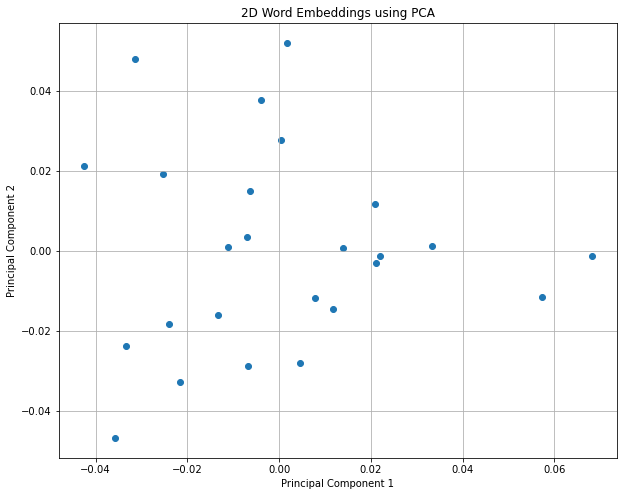

In [ ]:
# Create a scatter plot for word embeddings
x, y = zip(*word_vectors_2D)

plt.figure(figsize=(10, 8))
plt.scatter(x, y)

plt.title('2D Word Embeddings using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

In [ ]:
# f) Find similarity between the word vectors for ‘nlp’ and ‘data’

In [ ]:
similarity = model.wv.similarity('nlp', 'data')
print(f"Similarity between 'nlp' and 'data': {similarity}")

Similarity between 'nlp' and 'data': 0.140981525182724


In [ ]:
# g) Find the most similar word vectors for the word vector ‘machine’

In [ ]:
similar_words = model.wv.most_similar('machine')
print(similar_words)

[('saves', 0.5130521655082703), ('of', 0.4277428984642029), ('nlp', 0.3354583978652954), ('in', 0.3304442763328552), ('i', 0.3191339671611786), ('time', 0.30943119525909424), ('industry', 0.28834736347198486), ('solves', 0.23513862490653992), ('data', 0.23137910664081573), ('a', 0.23037660121917725)]


In [ ]:
# h) Find the odd one out for the word vectors ‘nlp’, ‘industry’, ‘learning’

In [ ]:
words = ['nlp', 'industry', 'learning']
odd_one_out = model.wv.doesnt_match(words)
print(odd_one_out)

learning


In [ ]:
# 2. For the above corpus, build document vectors using Gensim library with:

In [ ]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

In [ ]:
# a) 10 features, context window is 3

In [ ]:
tagged_data = [TaggedDocument(words=word_tokenize(sentence.lower()), tags=[str(i)]) for i, sentence in enumerate(corpus)]

model = Doc2Vec(
    vector_size=10,  # Number of features for document vectors
    window=3,        # Context window size
    min_count=1,     # Minimum word count threshold
    epochs=100,      # Number of training epochs
)

model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=len(tagged_data), epochs=model.epochs)
document_vector = model.dv['0']
print("Document Vector for the First Document:")
print(document_vector)

Document Vector for the First Document:
[-0.05332936 -0.05729878 -0.10860898  0.08369651  0.03890583 -0.00393554
 -0.10107889 -0.05401127 -0.10592     0.01654533]


In [ ]:
# b) Print the vocabulary of the model

In [ ]:
vocabulary = model.dv.index_to_key
print("Vocabulary of the Doc2Vec Model:")
print(vocabulary)


Vocabulary of the Doc2Vec Model:
['0', '1', '2', '3', '4']


In [ ]:
# c) Print the document vector for each sentence in the corpus

In [ ]:
for i, tagged_document in enumerate(tagged_data):
    document_vector = model.dv[i]
    print(f"Document Vector for Sentence {i + 1}:")
    print(document_vector)


Document Vector for Sentence 1:
[-0.05332936 -0.05729878 -0.10860898  0.08369651  0.03890583 -0.00393554
 -0.10107889 -0.05401127 -0.10592     0.01654533]
Document Vector for Sentence 2:
[ 0.02983121  0.06274777 -0.08400786 -0.04606267 -0.01997486 -0.11536487
  0.01778608  0.08251866 -0.13410294 -0.04966425]
Document Vector for Sentence 3:
[-0.03869024  0.04131288 -0.0920127   0.01843012  0.07440419 -0.10655171
 -0.09237545 -0.11899783  0.02308581 -0.11062206]
Document Vector for Sentence 4:
[ 0.06189362  0.09167543 -0.12067029 -0.06602337  0.00710281 -0.0187855
 -0.02157863 -0.10893134 -0.08511589 -0.0034946 ]
Document Vector for Sentence 5:
[-0.02006214 -0.06884596  0.02865339 -0.0935908   0.03155822 -0.05767892
  0.00482925 -0.02489343  0.04219805 -0.08867103]


In [ ]:
# d) Find similarity between 3rd and 5th sentence

In [ ]:
from scipy.spatial.distance import cosine

vector_3rd_sentence = model.dv[2]
vector_5th_sentence = model.dv[4]
similarity = 1 - cosine(vector_3rd_sentence, vector_5th_sentence)
print(f"Similarity between the 3rd and 5th sentences: {similarity}")


Similarity between the 3rd and 5th sentences: 0.35360071063041687


In [ ]:
# e) Find the most similar document vector for the 5th sentence

In [ ]:
similar_doc = model.dv.most_similar('4', topn=1)
print(f"Most similar document to the 5th sentence: {similar_doc}")


Most similar document to the 5th sentence: [('2', 0.35360071063041687)]


In [ ]:
# 3. For the above corpus, build character n-gram vectors using Gensim library with:

In [ ]:
from gensim.models import FastText
from nltk.util import ngrams

In [ ]:
# a) 20 features, context window is 4, min character n-gram 3 and max character n-gram 6

In [ ]:
tokenized_corpus = [' '.join([''.join(sentence[i:i+n]) for i in range(len(sentence) - 2) for n in range(3, 7)]) for sentence in corpus]

model = FastText(
    sentences=tokenized_corpus,
    vector_size=20,
    window=4,
    min_n=3,
    max_n=6
)


model.build_vocab(tokenized_corpus)

model.train(tokenized_corpus, total_examples=len(tokenized_corpus), epochs=100)

vector = model.wv['nlp']
print(vector)

[-0.01309639  0.01053239  0.01166811 -0.00180606  0.02148186 -0.01545579
  0.00206937  0.02023758  0.00782872 -0.00781594  0.00324784 -0.02400987
  0.01399452 -0.01050598  0.01043481 -0.00056397 -0.01784237  0.00624329
 -0.01030751 -0.01540622]


In [ ]:
# b) Print the vocabulary of the model

In [ ]:
vocabulary = model.wv.index_to_key
print("Vocabulary of the FastText Model:")
print(vocabulary)

Vocabulary of the FastText Model:
[' ', 'e', 'n', 'l', 's', 'a', 'i', 't', 'o', 'r', 'p', 'u', 'm', 'f', 'd', 'v', 'h', 'c', 'b', 'y', '2', 'w', 'g', 'I']


In [ ]:
# c) Find similarity between the Out of vocabulary vectors ‘mac’ and ‘mon’

In [ ]:
from scipy.spatial.distance import cosine
import numpy as np

word1 = 'mac'
word2 = 'mon'

vector_word1 = np.mean([model.wv[ngram] for ngram in word1], axis=0)
vector_word2 = np.mean([model.wv[ngram] for ngram in word2], axis=0)

similarity = 1 - cosine(vector_word1, vector_word2)
print(f"Similarity between '{word1}' and '{word2}': {similarity:.4f}")


Similarity between 'mac' and 'mon': 0.5440


In [ ]:
# d) Find the most similar vectors for the out of vocabulary vector ‘macmon’

In [ ]:
from scipy.spatial.distance import cosine
import numpy as np

oov_word = 'macmon'
oov_vector = np.mean([model.wv[ngram] for ngram in oov_word], axis=0)
similar_vectors = model.wv.most_similar(positive=[oov_vector], topn=5)

print(f"Most similar vectors to '{oov_word}':")
for word, score in similar_vectors:
    print(f"Word: {word}, Similarity Score: {score}")


Most similar vectors to 'macmon':
Word: m, Similarity Score: 0.8831571340560913
Word: c, Similarity Score: 0.6965962052345276
Word: a, Similarity Score: 0.658580482006073
Word: 2, Similarity Score: 0.5176978707313538
Word: e, Similarity Score: 0.49246418476104736
